### Model that accurately predicts wind turbine power output from wind speed values provided in the data set

***

A wind power forecast claculates an estimate expected power production for one or more wind turbines.


https://lucdemortier.github.io/articles/17/WindPower

In [6]:
# import libraries
# Numerical arrays
import numpy as np
# Machine Learning - KMeans
import sklearn.cluster as skcl
# Import Pandas library to analyze the data
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
# More Plotting
import seaborn as sns
# Machine Learning
import sklearn.linear_model as lm


In [7]:
m = lm.LinearRegression()

#### Data import and visualizations

In [8]:
# Import Dataset into Dataframe
ppdf = pd.read_csv("powerproduction.csv")
ppdf


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


The data set consists of the following fields:<br><br>
ID     - Measurement ID <br>
speed  - Wind speed <br>
power  - Turbine power output <br>
***

In [9]:
x = ppdf[['speed']]

In [10]:
y = ppdf['power']


In [11]:
m.fit(x,y)

LinearRegression()

In [12]:
m.intercept_

-13.899902630519634

In [13]:
m.coef_


array([4.91759567])

In [14]:
m.score(x, y)

0.7289360258564073

### Using statsmodel

In [15]:
import statsmodels.api as sm

#Tell statsmodel to include an intercept
xwithc = sm.add_constant(x)

#Create a model

msm = sm.OLS(y, xwithc)
#Fit the data
rsm = msm.fit()
#Print a summary
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                  power   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1339.
Date:                Sat, 02 Jan 2021   Prob (F-statistic):          2.86e-143
Time:                        23:56:03   Log-Likelihood:                -2246.8
No. Observations:                 500   AIC:                             4498.
Df Residuals:                     498   BIC:                             4506.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.8999      1.950     -7.128      0.0

R-squared of power is equal to 0.729 and adjustable R-squared is equal to 0.728 which indicate that the linear regression predictions is not the strongest and may not allow us to predict the power accurately.  
Prob(F-Statistic) tells the overall significance of the regression. he null hypothesis under this is “all the regression coefficients are equal to zero”. Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is close to zero. This implies that overall the regressions is meaningful. Lets check it on the plot.

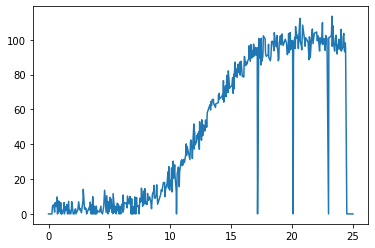

In [16]:
#Do regresssion on the x and y arrays using numpy
plt.plot(x,y,9)

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


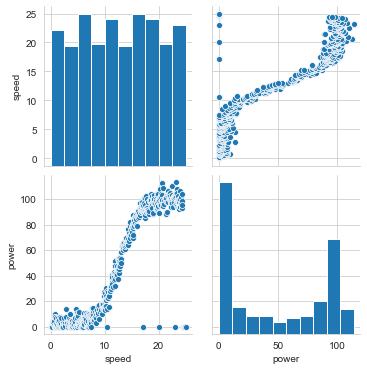

In [18]:
# use Pairplot to get basic overview of relationship between wind speed and power
sns.pairplot(ppdf, size=2.5)
plt.show()

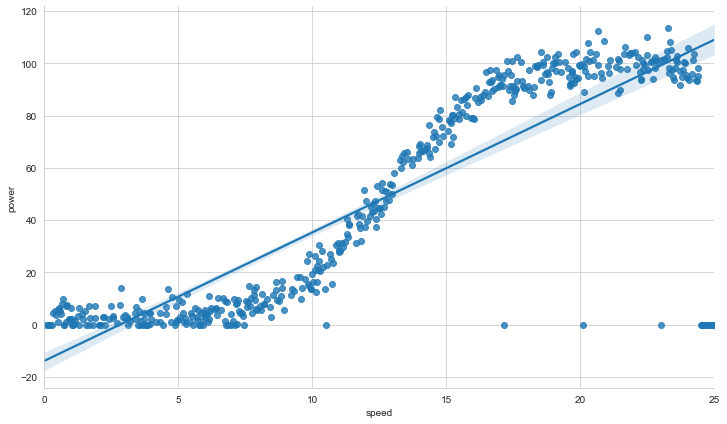

In [22]:
# visualize the dots with the straight line  
sns.set_style("whitegrid")

sns.lmplot(x="speed", y="power", data=ppdf, height=6, aspect=1.7, fit_reg=True);

In [21]:
The distribution of the dots is not even. It looks that at the top right most of the dots are above the line.
In the bottem left corner most of the points are below the line. This suggest that perhaps curve is better choice than line in this instance. Lets try to add the curve model.

SyntaxError: invalid syntax (<ipython-input-21-507d63a77428>, line 1)

### Model

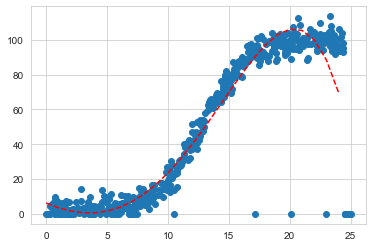

In [19]:
# creating curve fit 
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f
 

# choose the input and output variables
x, y = ppdf['speed'], ppdf['power']
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d, e, f = popt
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()
# code adopted from https://machinelearningmastery.com/curve-fitting-with-python/

In [20]:
#polynomial regression
x=ppdf[['speed']]
y=ppdf['power']
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
poly_reg = PolynomialFeatures(degree = 5)
x_poly = poly_reg.fit_transform(x_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)


LinearRegression()

Observations from the data so far:<br>
1. There seems to be a strong coorelation between the spped of the wind and the turbine power;<br>
2. Peaks in wind speed correspond to peaks in turbine power<br>
3. the effect of the cut-in speed is also visible (periods of zero turbine output associated with low, but non-zero wind speed).<br>
